# USL Mini Project

### Libraries

In [69]:
# write your code here
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Dataset

In [37]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


### Null value Imputation

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

* No null values in the dataset

### Outlier Analysis

In [43]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4


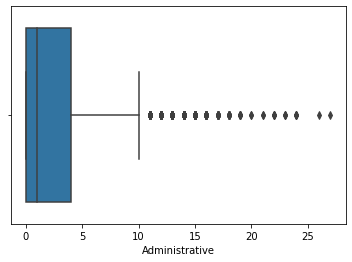

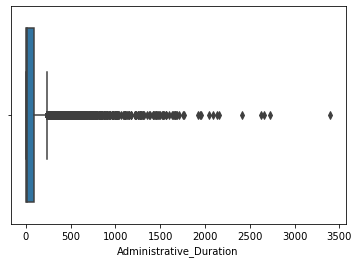

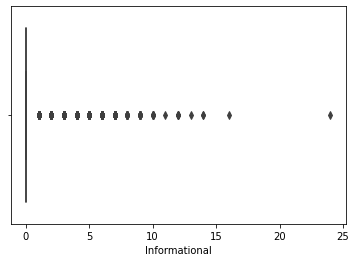

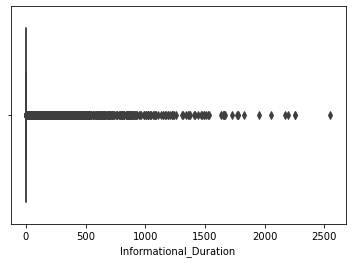

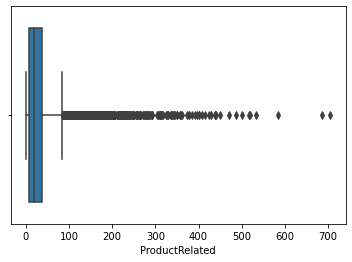

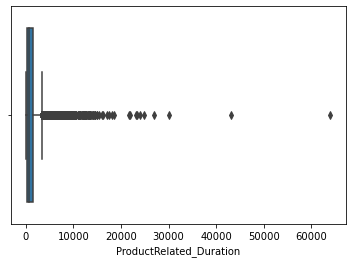

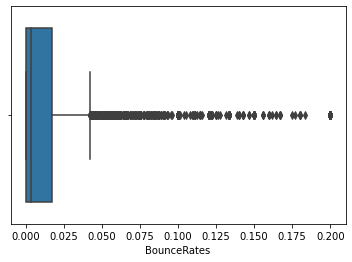

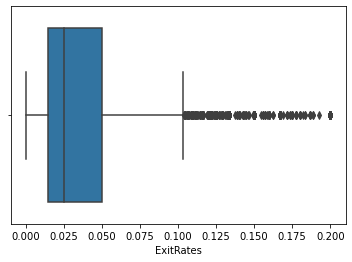

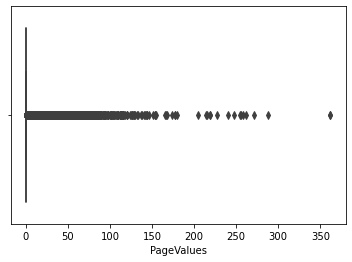

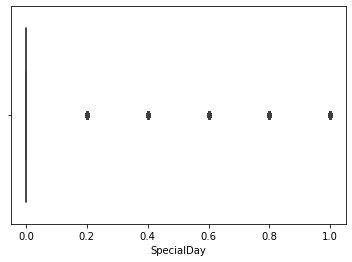

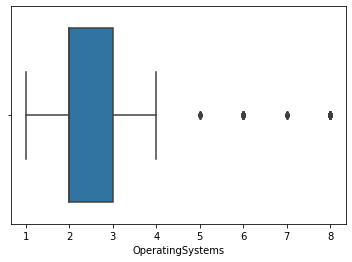

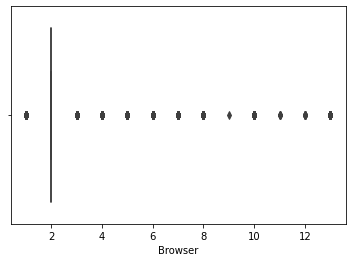

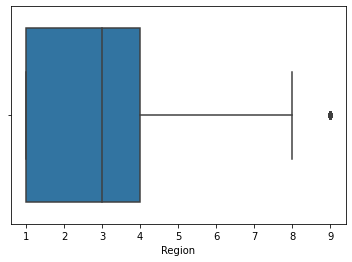

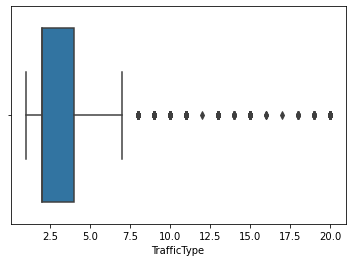

In [45]:
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

### Scaling

In [52]:
df_num = df_num.apply(lambda x : (x - x.mean())/x.std())

In [53]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,-1.233376,-0.790261,-0.894142,-0.762598
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809,-0.136073,-0.207943,-0.894142,-0.514161
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,2.058534,-0.790261,2.436983,-0.265725
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809,0.961231,-0.207943,-0.477752,-0.017288
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809,0.961231,0.374374,-0.894142,-0.017288


In [55]:
df_num.std()

Administrative             1.0
Administrative_Duration    1.0
Informational              1.0
Informational_Duration     1.0
ProductRelated             1.0
ProductRelated_Duration    1.0
BounceRates                1.0
ExitRates                  1.0
PageValues                 1.0
SpecialDay                 1.0
OperatingSystems           1.0
Browser                    1.0
Region                     1.0
TrafficType                1.0
dtype: float64

### Correlation and Covariance Matrix

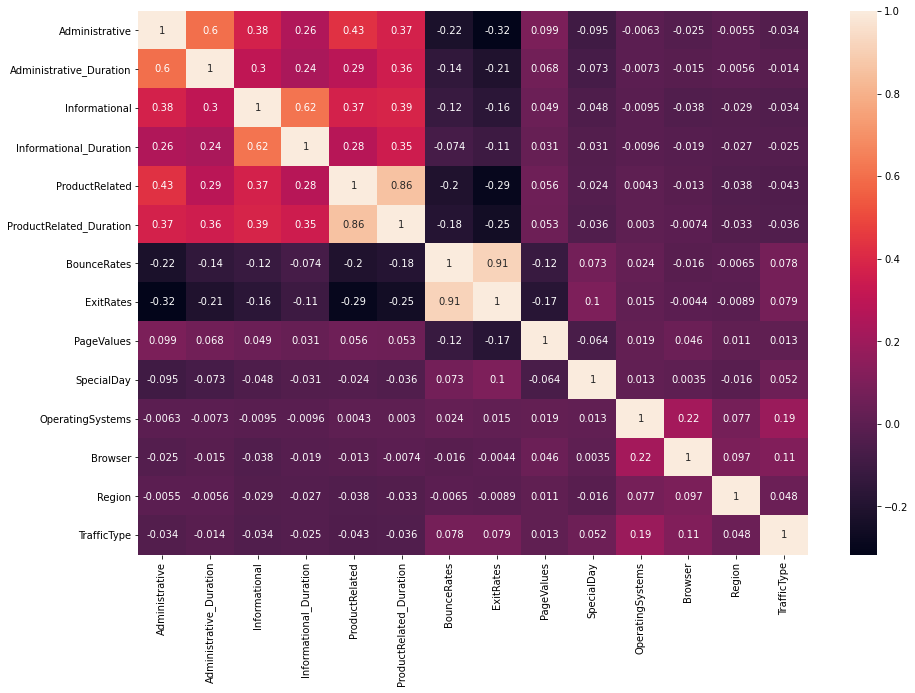

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

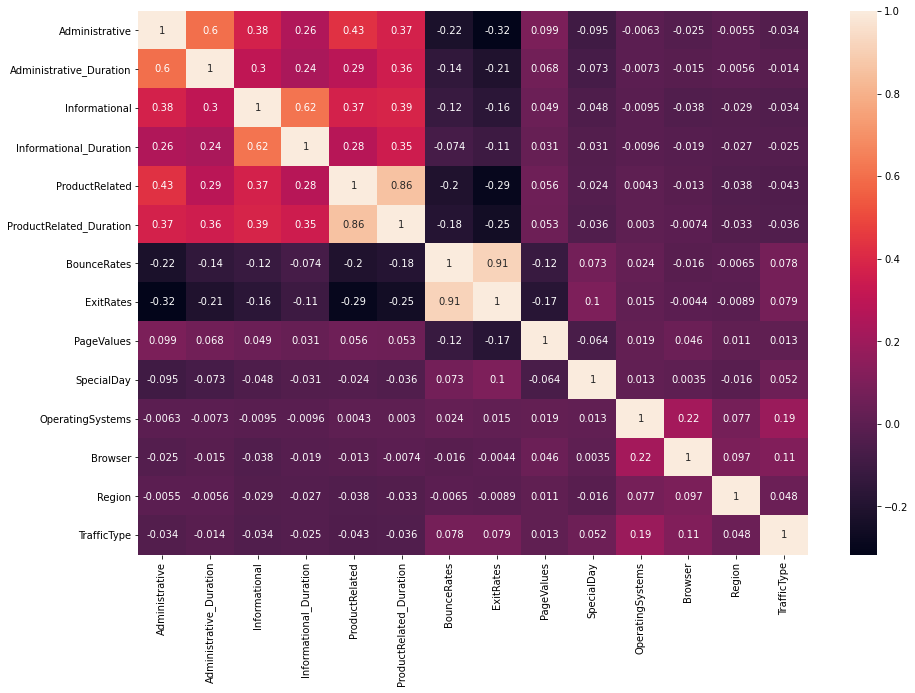

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.cov(),annot=True)
plt.show()

In [60]:
pca = PCA(n_components=14, random_state=10)

In [61]:
comp = pca.fit_transform(df_num)

In [62]:
pca.explained_variance_ ## Eigen values

array([3.40836182, 1.68559773, 1.40012059, 1.07806294, 1.00999486,
       0.96796607, 0.94997434, 0.91439062, 0.85865393, 0.75355935,
       0.42138952, 0.35160631, 0.12283967, 0.07748225])

In [64]:
pca.components_  ## Eigen vector

array([[ 0.38134204,  0.32796714,  0.34708181,  0.29520138,  0.41066029,
         0.41241318, -0.27888606, -0.32482077,  0.09275255, -0.07174688,
        -0.01409462, -0.01791629, -0.02065447, -0.0519306 ],
       [ 0.0540027 ,  0.10831004,  0.28053411,  0.30249569,  0.14991665,
         0.19057979,  0.60502007,  0.57515027, -0.18493151,  0.10743671,
         0.0222374 , -0.05048809, -0.0603783 ,  0.08411563],
       [ 0.03095707,  0.03841179, -0.01988211, -0.01648229,  0.0336399 ,
         0.03814242,  0.00934578, -0.00206529,  0.12604609,  0.03852271,
         0.59727163,  0.55103164,  0.30224122,  0.47447919],
       [-0.25426497, -0.31861991, -0.15150509, -0.14156792,  0.38256561,
         0.34915589, -0.12615762, -0.09346188, -0.31207921,  0.58725463,
         0.05967564,  0.01476321, -0.21950498,  0.06078869],
       [-0.31514613, -0.37119419,  0.47048933,  0.59888141, -0.24110431,
        -0.2077062 , -0.1869613 , -0.13330912,  0.02707277,  0.14573622,
         0.04362467,  0.06

In [65]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24345442, 0.36385425, 0.46386287, 0.54086736, 0.61300985,
       0.68215029, 0.7500056 , 0.81531921, 0.87665164, 0.9304773 ,
       0.96057655, 0.98569129, 0.99446555, 1.        ])

* We are building a model which explain 90% of Variation

In [67]:
pca_df = pd.DataFrame(comp,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-3.156102,3.608653,-1.902749,-0.846870,-0.895031,0.363064,0.900271,0.246934,0.337174,0.216418,-0.113589,-0.076896,-0.064607,-0.260458
1,-1.353150,-0.044754,-0.840874,-0.024725,0.222829,0.357475,0.337614,-0.669216,0.323568,-0.112149,0.190301,0.067807,0.201822,1.064152
2,-3.297105,3.522524,1.305975,-1.351417,-0.843801,-1.772405,0.494539,0.789923,-0.486050,-2.211695,-0.044438,-0.074978,-0.068377,-0.220105
3,-1.971180,1.087483,0.182835,-0.238648,-0.038621,0.335190,0.386947,-0.647831,0.077108,-0.789054,0.122244,0.030151,0.152135,0.967609
4,-0.990377,-0.267081,0.394407,0.295310,0.261999,0.538700,0.468323,-1.043057,0.333038,-0.432179,0.207683,0.061840,0.111494,0.051119


In [68]:
pca_new = pca_df.iloc[:,0:10]
pca_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.156102,3.608653,-1.902749,-0.846870,-0.895031,0.363064,0.900271,0.246934,0.337174,0.216418
1,-1.353150,-0.044754,-0.840874,-0.024725,0.222829,0.357475,0.337614,-0.669216,0.323568,-0.112149
2,-3.297105,3.522524,1.305975,-1.351417,-0.843801,-1.772405,0.494539,0.789923,-0.486050,-2.211695
3,-1.971180,1.087483,0.182835,-0.238648,-0.038621,0.335190,0.386947,-0.647831,0.077108,-0.789054
4,-0.990377,-0.267081,0.394407,0.295310,0.261999,0.538700,0.468323,-1.043057,0.333038,-0.432179


### KMeans

In [72]:
sil_score=[]

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    a = kmeans.fit_predict(pca_new)
    wcss.append(silhouette_score(pca_new,a))
    
print(sil_score)

[0.31642108381422934, 0.32555969809419705, 0.28748531020011187, 0.242796560880935, 0.22986789279052622, 0.2106841326275231]


* Since the sil_score of cluster 3 is high, the optimal no of clusters is 3

In [78]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(pca_new)

array([1, 2, 1, ..., 2, 2, 2])

In [81]:
df['Cluster'] = kmeans.labels_

In [82]:
df['Cluster'].value_counts()

2    9663
0    1611
1    1056
Name: Cluster, dtype: int64

In [84]:
df[df['Cluster'] == 0].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.000000,1611.0
mean,7.367474,312.615932,2.519553,214.605842,96.927374,3847.775074,0.006239,0.019354,9.736185,0.029174,2.112973,2.227188,2.927995,3.596524,0.0
std,4.534235,358.251524,2.299897,326.608083,83.010216,3764.636370,0.007670,0.011853,20.099904,0.139984,0.784730,1.443523,2.283297,3.606562,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,27.375000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,4.000000,94.000000,1.000000,6.000000,40.000000,1564.303174,0.000559,0.011280,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.0
50%,7.000000,200.583333,2.000000,94.000000,76.000000,2816.438810,0.004000,0.017397,1.816474,0.000000,2.000000,2.000000,2.000000,2.000000,0.0
75%,10.000000,381.586561,4.000000,264.425000,128.500000,5064.437427,0.008766,0.024899,10.489394,0.000000,2.000000,2.000000,4.000000,4.000000,0.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.066667,0.100000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000,0.0


In [85]:
df[df['Cluster'] == 1].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.0,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.0
mean,0.048295,1.412753,0.016098,0.092045,3.093750,57.863902,0.165943,0.180069,0.0,0.110985,2.178977,2.316288,3.054924,5.021780,1.0
std,0.286401,21.803695,0.153092,1.516323,4.564204,196.675244,0.051537,0.031213,0.0,0.252893,1.062579,1.829293,2.358169,4.973341,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091556,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,0.150000,0.0,0.000000,1.000000,2.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,24.000000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,6.500000,1.0
max,4.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.000000,8.000000,13.000000,9.000000,20.000000,1.0


In [86]:
df[df['Cluster'] == 2].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
count,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.0
mean,1.720584,50.851427,0.220739,8.198019,23.991721,876.679185,0.009141,0.032056,5.891499,0.061389,2.119839,2.383214,3.194039,4.044396,2.0
std,2.339653,88.841896,0.625327,35.684558,22.701002,944.008528,0.015133,0.024845,19.141047,0.199498,0.912959,1.745502,2.423347,3.958410,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,219.500000,0.000000,0.013815,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.0
50%,1.000000,4.000000,0.000000,0.000000,17.000000,561.550000,0.000000,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.0
75%,3.000000,69.600000,0.000000,0.000000,32.000000,1203.768572,0.012903,0.043106,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000,2.0
max,14.000000,844.000000,5.000000,686.000000,176.000000,7515.583333,0.100000,0.133333,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,2.0


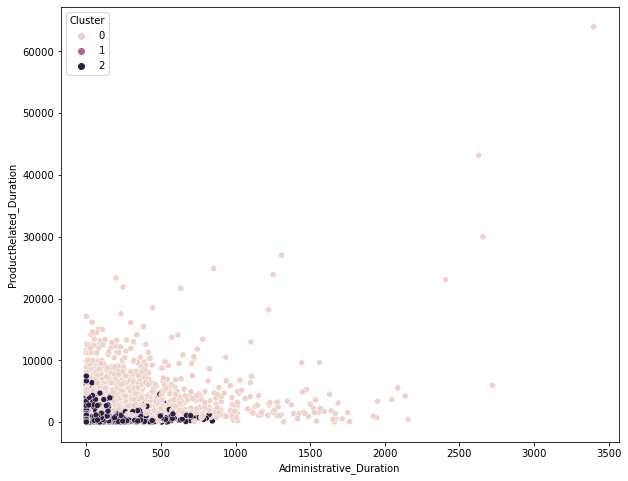

In [99]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Administrative_Duration'], y=df['ProductRelated_Duration'],hue=df['Cluster'])
plt.show()